# SUICIDAL AND NON- SUICIDAL TWEETS DETECTION MODEL

## 1. Importing important Libraries

In [3]:
#installing some important libraries
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [4]:
#using VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
#importing pandas, re, nltk-> importing some more important libraries
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Loading the data

In [8]:
#loading the data 
df=pd.read_csv("C:\\Users\\vikra\\Downloads\\archive\\Suicide_Ideation_Dataset(Twitter-based).csv")
df.head(10)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post
8,time for some warsaw beer garden chilling,Not Suicide post
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post


In [9]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


## 3. Pre- Processing the data

In [11]:
#data preprocessing -> dropping null and duplicate columns
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [12]:
#cleaning the data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.split()
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = " ".join(text)
    return text

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
# Preprocess tweets
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

In [15]:
#data after pre processing 
df.head(10)

,Tweet,Suicide,Processed_Tweet
0,making some lunch,Not Suicide post,making lunch
1,@Alexia You want his money.,Not Suicide post,alexia want money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,dizzyhrvy crap took forever put together iâm g...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,jnaylor kiwitweets hey jer since start twittering
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying quotdelicious library 2quot mixed resul...
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post,valenvaldez oh thats good hear already youll c...
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post,mcm180 uve got list fellow hotties gonna share...
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post,jakepaul jamescharles loganpaul shane made ser...
8,time for some warsaw beer garden chilling,Not Suicide post,time warsaw beer garden chilling
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post,hate life lmao hope die soon sumn im tired eve...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 0 to 1786
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            1777 non-null   object
 1   Suicide          1777 non-null   object
 2   Processed_Tweet  1777 non-null   object
dtypes: object(3)
memory usage: 55.5+ KB


## 4. Visualising the data

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def get_negative_words(text):
    words = text.split()
    negative_words = [word for word in words if sia.polarity_scores(word)['compound'] < 0]
    return negative_words


In [20]:
df['Negative_Words'] = df['Processed_Tweet'].apply(get_negative_words)
negative_words = [word for sublist in df['Negative_Words'] for word in sublist]

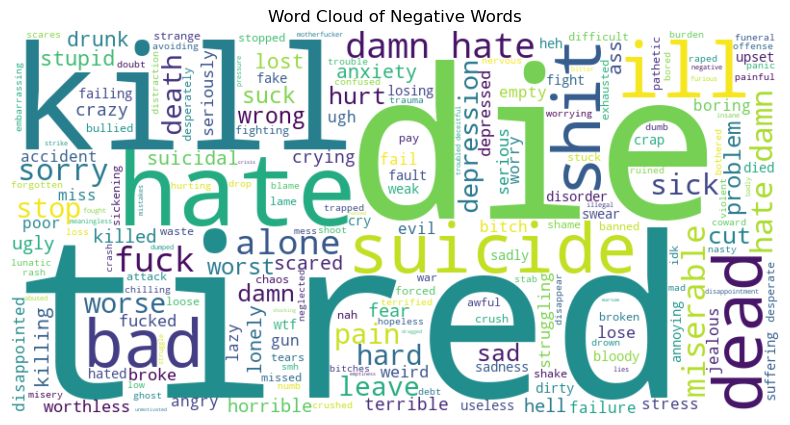

In [21]:
# Generatinng  word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Words')
plt.show()


<Axes: xlabel='Suicide', ylabel='count'>

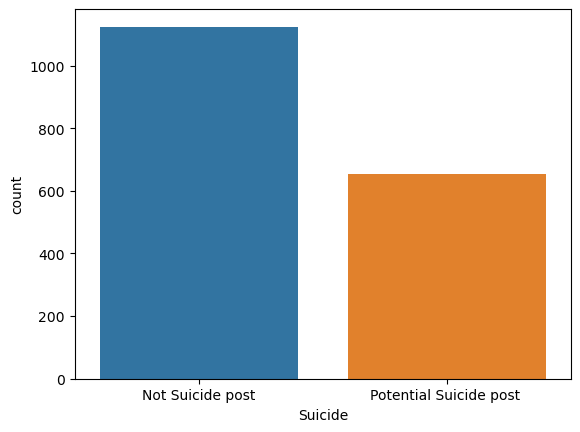

In [22]:
#bar plot of "suicidal" & "non suicidal post"
import seaborn as sns
sns.countplot(x=df['Suicide'],data=df)

In [23]:
#points from data->
#there are more about 600 which are "POTENTIAL SUICIDE POST" and more thann 1000 are "NOT SUICIDE POST".

## 5. Making models to predict the data

### 1. USING VADER SENTIMENT ANALYSIS

In [26]:
def analyze_tweet(tweet):
    sentiment_scores = sia.polarity_scores(tweet)
    return {
        'compound': sentiment_scores['compound'],
        'positive': sentiment_scores['pos'],
        'neutral': sentiment_scores['neu'],
        'negative': sentiment_scores['neg']
    }

df[['compound', 'positive', 'neutral', 'negative']] = df['Tweet'].apply(lambda x: pd.Series(analyze_tweet(x)))

In [27]:
suicide_keywords = ['suicidal', 'hopeless', 'alone', 'end it', 'worthless', 'die']

def detect_suicide(tweet):
    # Check for keywords
    if any(keyword in tweet for keyword in suicide_keywords):
        return 'Potential Suicide post'
    
    # Use sentiment scores as a heuristic
    sentiment = analyze_tweet(tweet)
    if sentiment['negative'] > 0.3 and sentiment['compound'] < -0.5:
        return 'Potential Suicide post'
    
    return 'Not Suicide post'

df['Predicted_Suicide'] = df['Tweet'].apply(detect_suicide)

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have your true labels and predictions
true_labels = df['Suicide']
predictions = df['Predicted_Suicide']

print("Accuracy:", accuracy_score(true_labels, predictions))
print("Classification Report:\n", classification_report(true_labels, predictions))


Accuracy: 0.6128306133933596
Classification Report:
                          precision    recall  f1-score   support

       Not Suicide post       0.74      0.97      0.84      1124
 Potential Suicide post       0.00      0.00      0.00         0
Potential Suicide post        0.00      0.00      0.00       653

               accuracy                           0.61      1777
              macro avg       0.25      0.32      0.28      1777
           weighted avg       0.47      0.61      0.53      1777



C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [29]:
#using VADER model, we are only getting 61 percent accuracy

### 2. Random Forest classifier 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Suicide'], test_size=0.3, random_state=42)

model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

df['Predicted_Suicide'] = model.predict(df['Tweet'])

Accuracy: 0.9344569288389513
Classification Report:
                          precision    recall  f1-score   support

       Not Suicide post       0.93      0.96      0.95       327
Potential Suicide post        0.93      0.89      0.91       207

               accuracy                           0.93       534
              macro avg       0.93      0.93      0.93       534
           weighted avg       0.93      0.93      0.93       534



In [32]:
#using random forest classifier -> we are getting 93 percent accuracy 

In [33]:
df2=model.predict(["i want to do suicide"])
df2

array(['Not Suicide post'], dtype=object)

In [34]:
# But we are not getting correct output, even after changing keywords, feature engeenering -> Overfitting the data

### 3. Logistic Regression Model

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweet'])
y = df['Suicide']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [38]:
y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9382022471910112
Classification Report:
                          precision    recall  f1-score   support

       Not Suicide post       0.93      0.97      0.95       211
Potential Suicide post        0.95      0.90      0.92       145

               accuracy                           0.94       356
              macro avg       0.94      0.93      0.94       356
           weighted avg       0.94      0.94      0.94       356



In [39]:
#using logistic regression model, we are 94 percent acccuiracy

In [40]:
#testing the data
test_tweet = ["i want to do suicide"]
test_tweet_vectorized = vectorizer.transform(test_tweet)
prediction = model1.predict(test_tweet_vectorized)
print(f"Model prediction for '{test_tweet[0]}': {prediction}")

Model prediction for 'i want to do suicide': ['Potential Suicide post ']


###  ROC Curve


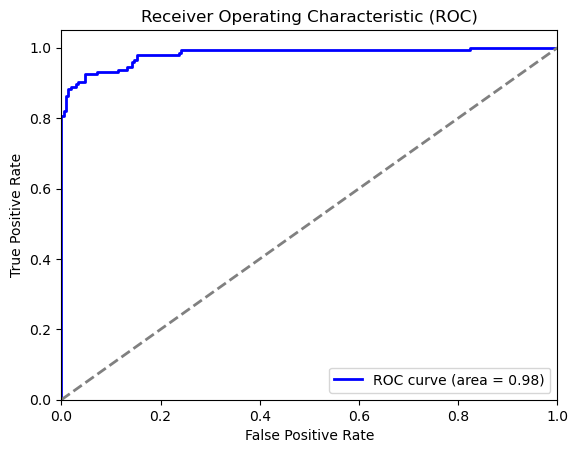

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predicting the probabilities for the positive class
y_pred_proba = model1.predict_proba(X_test)[:, 1]

# Map the labels to binary values
y_test_binary = y_test.map({'Not Suicide post': 0, 'Potential Suicide post ': 1})

# Generate ROC curve values
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix

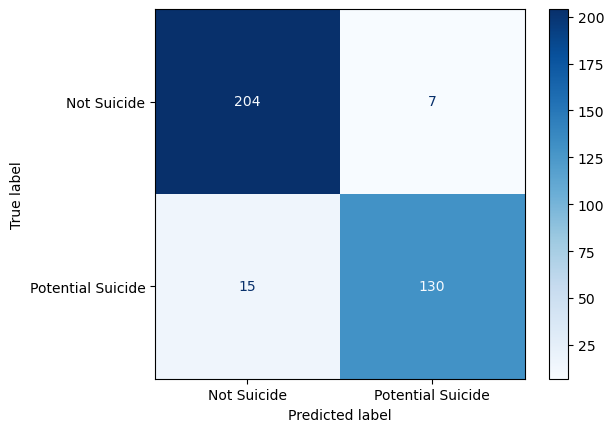

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_binary, y_pred_proba > 0.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Suicide', 'Potential Suicide'])
disp.plot(cmap='Blues')
plt.show()


##  Precision-Recall Curve

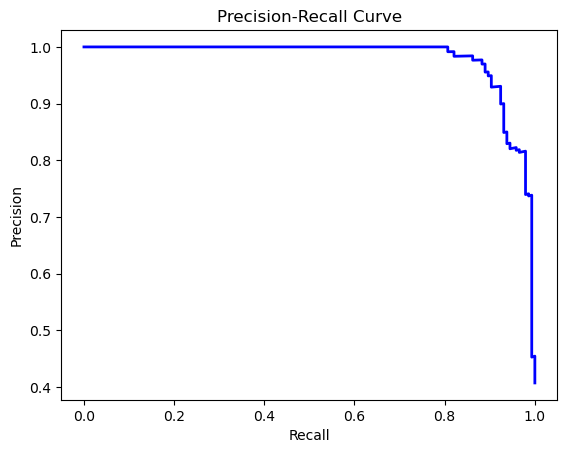

In [104]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


***From our model, logistic regression model is working very well and prediciting suicidal and non- suicidal posts correctly.***

## 6. Creating small chatbot from this model with the help of some other files 

In [66]:
def preprocess_input(text):
    return vectorizer.transform([text])


In [68]:

def stress_management():
    # List of stress management activities
    activities = [
        "Try some deep breathing exercises. They can help calm your mind and reduce stress.",
        "Take a short walk outside to get some fresh air and clear your mind.",
        "Engage in a hobby you enjoy, such as reading, painting, or playing music.",
        "Practice mindfulness or meditation to help center yourself.",
        "Take a break and do some stretching or light exercise to relieve tension."
    ]

    # List of helpful websites for stress management
    websites = [
        "https://www.calm.com/ - A website offering meditation and relaxation exercises.",
        "https://www.headspace.com/ - Provides guided meditation and mindfulness practices.",
        "https://www.moodfitapp.com/ - An app for tracking mood and managing stress.",
        "https://www.mentalhealth.gov/ - Offers resources and information on mental health.",
        "https://www.psychologytoday.com/ - Provides articles and therapy resources for stress management."
    ]

    # Combining activities and websites into a single response
    response = "Here are some activities you might find helpful for managing stress:\n"
    response += "\n".join(f"- {activity}" for activity in activities) + "\n\n"
    response += "You can also check out these websites for more resources:\n"
    response += "\n".join(f"- {website}" for website in websites)

    return response

In [70]:
games = ["Trivia Quiz", "Puzzle Challenge", "Word Search", "Riddles", "Guess the Word"]
# Define game functions
def trivia_quiz():
    questions = [
        {"question": "Who wrote 'To Kill a Mockingbird'?", "answer": "harper lee"},
        {"question": "What is the capital of France?", "answer": "paris"},
        {"question": "Which planet is known as the Red Planet?", "answer": "mars"}
    ]
    question = random.choice(questions)
    print(f"Trivia Question: {question['question']}")
    user_answer = input("Your answer: ").strip().lower()
    if user_answer == question['answer']:
        print("Correct!")
    else:
        print(f"Incorrect. The correct answer is {question['answer']}.")

import random

def puzzle_challenge():
    # List of puzzles with their answers
    puzzles = [
        {"puzzle": "tinsel", "answer": "silent"},
        {"puzzle": "teacup", "answer": "capture"},
        {"puzzle": "tar", "answer": "art"},
        {"puzzle": "bake", "answer": "beak"},
        {"puzzle": "drawer", "answer": "reward"},
        {"puzzle": "hints", "answer": "stinh"}
    ]

    # Randomly select a puzzle
    selected_puzzle = random.choice(puzzles)
    puzzle = selected_puzzle["puzzle"]
    answer = selected_puzzle["answer"]

    # Print the puzzle and get the user's answer
    print(f"Unscramble the letters to form a word: '{puzzle}'")
    user_answer = input("Your answer: ").strip().lower()

    # Check if the user's answer is correct
    if user_answer == answer:
        print("Correct!")
    else:
        print(f"Incorrect. The correct answer is {answer}.")


def word_search():
    words = ["python", "chatbot", "machine", "learning"]
    print("Find the following words in the grid: " + ", ".join(words))
    print("Here's a grid with the words hidden:")
    grid = [
        ["p", "y", "t", "h", "o", "n"],
        ["a", "b", "c", "h", "a", "t"],
        ["m", "a", "c", "h", "i", "n"],
        ["c", "h", "a", "t", "b", "o"],
        ["h", "t", "i", "n", "g", "e"],
        ["b", "i", "r", "d", "l", "e"]
          ]
    for row in grid:
        print(" ".join(row))
    input("Press Enter when you have found the words...")

def riddles():
    riddles = [
        {"riddle": "I speak without a mouth and hear without ears. I have no body, but I come alive with wind. What am I?", "answer": "echo"},
        {"riddle": "The more you take, the more you leave behind. What am I?", "answer": "footsteps"},
        {"riddle": "I have cities, but no houses. I have mountains, but no trees. I have water, but no fish. What am I?", "answer": "map"}
    ]
    riddle = random.choice(riddles)
    print(f"Riddle: {riddle['riddle']}")
    user_answer = input("Your answer: ").strip().lower()
    if user_answer == riddle['answer']:
        print("Correct!")
    else:
        print(f"Incorrect. The correct answer is {riddle['answer']}.")

def guess_the_word():
    words = ["python", "chatbot", "machine", "learning"]
    word = random.choice(words)
    print("Guess the word. It has", len(word), "letters.")
    attempts = 5
    while attempts > 0:
        guess = input("Your guess: ").strip().lower()
        if guess == word:
            print("Correct! The word was", word)
            return
        else:
            attempts -= 1
            print("Incorrect. Try again. Remaining attempts:", attempts)
    print(f"Out of attempts! The correct word was {word}.")


websites = [
    "https://www.nationalgeographic.com",
    "https://www.calm.com/",
    "https://www.rainymood.com/",
    "https://make-everything-ok.com/",
    "https://xhalr.com/",
    "https://www.pixelthoughts.co/",
    "https://my.happify.com/",
    "https://www.750words.com/",
    "https://simplynoise.com/https://simplynoise.com/",
    "https://explore.org/livecams",
    "https://play.playster.com/",
    "http://catsoundboard.com/"
]

def recommend_website():
    return "This is a great fun website.Check out this " + random.choice(websites)

In [80]:
import csv
import json
import re
import random
import joblib

# Load intents and models from files
file_path = "C:\\Users\\vikra\\Downloads\\intents.json"
with open(file_path, 'r') as file:
    data = json.load(file)

def load_keywords(file_path):
    keywords = {}
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) >= 2:
                keyword, response = row[0].strip(), row[1].strip()
                keywords[keyword.lower()] = response
    return keywords
#File  for some keyword matches
keywords = load_keywords("C:\\Users\\vikra\\OneDrive\\Desktop\\Desktop\\jhope\\keywords.csv")
# Define global variables
context = None
last_game = None

def preprocess_input(user_input):
    user_input = user_input.lower()
    user_input = re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', user_input)).strip()
    return user_input

def detect_suicide(user_input):
    preprocessed_input = preprocess_input(user_input)
    input_vector = vectorizer.transform([preprocessed_input])
    prediction = model1.predict(input_vector)
    return prediction[0] == "Potential Suicide post "

def match_intent(user_input, intents):
    for intent in intents:
        matched = False
        for pattern in intent['patterns']:
            if pattern:  # Skip empty patterns
                if re.search(pattern, user_input, re.IGNORECASE):
                    matched = True
                    break
        if matched:
            return random.choice(intent['responses'])  
    return None

def match_keyword(user_input, keywords):

    
    sorted_keywords = sorted(keywords.keys(), key=len, reverse=True)

    for keyword in sorted_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', user_input, re.IGNORECASE):
            return keywords[keyword]

    
    for keyword in sorted_keywords:
        if keyword in user_input.lower(): 
            return keywords[keyword]

    return None



def get_response(user_input):
    global context, last_game


    
    if detect_suicide(user_input):
        return ("I'm really sorry you're feeling this way, but I'm not equipped to help. Please reach out to someone who can provide the support you need. "
                "It's important to talk to a mental health professional or someone you trust. Please contact the National Suicide Prevention Lifeline at 1800-5990019, or reach out to a local emergency service.")

    preprocessed_input = preprocess_input(user_input)

    recommend_keywords = [
        "recommend", "suggest", "website", "site", "link", "resource", "where to go", "what to check out", "show me a website"
    ]

   
    if any(keyword in preprocessed_input for keyword in recommend_keywords):
        return recommend_website()

    stress_keywords = [
        "stress", "anxious", "nervous", "overwhelmed", "worried", "tense", "burnout"
    ]
    if any(keyword in preprocessed_input for keyword in stress_keywords):
        return stress_management()


    if "gameplay" in user_input.lower():
        context = "game"
        last_game = random.choice(["Trivia Quiz", "Puzzle Challenge", "Word Search", "Riddles", "Guess the Word"])
        print(f"Selected Game: {last_game}")
        if last_game == "Trivia Quiz":
            return trivia_quiz()
        elif last_game == "Puzzle Challenge":
            return puzzle_challenge()
        elif last_game == "Word Search":
            return word_search()
        elif last_game == "Riddles":
            return riddles()
        elif last_game == "Guess the Word":
            return guess_the_word()

    if context == "game" and user_input.lower() == "yes":
        print(f"Context is Game. Last Game: {last_game}")
        if last_game == "Trivia Quiz":
            return trivia_quiz()
        elif last_game == "Puzzle Challenge":
            return puzzle_challenge()
        elif last_game == "Word Search":
            return word_search()
        elif last_game == "Riddles":
            return riddles()
        elif last_game == "Guess the Word":
            return guess_the_word()

    # Checking for intent match
    response = match_intent(preprocessed_input, data['intents'])
    if response:
        return response
# Checking for keyword match
    response = match_keyword(preprocessed_input, keywords)
    if response:
        return response

    # Default response if no matches found
    return "Sorry, I didn't understand that."



In [82]:
# Test the chatbot
test_inputs = [
    "I am sad",
    "I want to die",
    "Hello there",
    "angry"
]

for test_input in test_inputs:
    print(f"User Input: {test_input}")
    print(f"Response: {get_response(test_input)}\n")

User Input: I am sad
Response: How long have you been feeling this way?

User Input: I want to die
Response: I'm really sorry you're feeling this way, but I'm not equipped to help. Please reach out to someone who can provide the support you need. It's important to talk to a mental health professional or someone you trust. Please contact the National Suicide Prevention Lifeline at 1800-5990019, or reach out to a local emergency service.

User Input: Hello there
Response: Hi there. What brings you here today?

User Input: angry
Response: Forgive me if I did anything to offend you. I only want to help.



In [86]:
# A small console chatbot
def run_chatbot():
    print("Chatbot: Hello! I'm here to help you. How can I assist you. I can play game and can recommend you website too. Write 'gameplay' to play game. Lets's begin our talk :D")
    while True:
        user_input = input("You: ")
        if user_input.lower() in ['exit', 'quit', 'bye']:
            print("Chatbot: Goodbye! Take care!")
            break
        response = get_response(user_input)
        print(f"Chatbot: {response}")

# Start the chatbot
run_chatbot()

Chatbot: Hello! I'm here to help you. How can I assist you. I can play game and can recommend you website too. Write 'gameplay' to play game. Lets's begin our talk :D


You:  hello


Chatbot: Hi there. How are you feeling today?


You:  I am very stressed. Can you help


Chatbot: Here are some activities you might find helpful for managing stress:
- Try some deep breathing exercises. They can help calm your mind and reduce stress.
- Take a short walk outside to get some fresh air and clear your mind.
- Engage in a hobby you enjoy, such as reading, painting, or playing music.
- Practice mindfulness or meditation to help center yourself.
- Take a break and do some stretching or light exercise to relieve tension.

You can also check out these websites for more resources:
- https://www.calm.com/ - A website offering meditation and relaxation exercises.
- https://www.headspace.com/ - Provides guided meditation and mindfulness practices.
- https://www.moodfitapp.com/ - An app for tracking mood and managing stress.
- https://www.mentalhealth.gov/ - Offers resources and information on mental health.
- https://www.psychologytoday.com/ - Provides articles and therapy resources for stress management.


You:  Thankyou. Bye


Chatbot: Have a nice day.


You:  Bye


Chatbot: Goodbye! Take care!


# Thank-You for exploring the project. I hope this chatbot will provide valuable support to those in need. We will definately try to bring more features in it :D